## Hopfield Networks

[Neural networks and physical systems with emergent collective computationalabilities](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC346238/pdf/pnas00447-0135.pdf) (1982)<br>
[Information storage in neural networks with low levels of activity](https://sci-hub.ru/10.1103/PhysRevA.35.2293) (1987)<br>
[The enhanced storage capacity in neural networks with low activity level](https://sci-hub.ru/10.1209/0295-5075/6/2/002) (1988)

In [2753]:
import numpy as np
import matplotlib.pyplot as plt

In [2754]:
# np.random.seed(123)

In [2755]:
class hopfield():
    def __init__(self, ndim):
        self.ndim = ndim
        self.weights = np.zeros((self.ndim, self.ndim))

    def train(self, data):
        for sample in data:
            memory = np.array([sample])
            self.weights += memory * memory.T # Outer product
            self.weights = (self.weights + self.weights.T) / 2 # Enforce symmetrical weights
        self.weights /= data.shape[0] # Normalise against dataset - (1/N)
        np.fill_diagonal(self.weights, 0) # Set the diagonal to zero

    def infer(self, state, units):
        idx = np.random.randint(0, self.ndim, size=units) # Index units
        spin = np.dot(self.weights[idx,:], state) # Weighted sum
        state[idx] = self.step(spin) # Threshold activation
        return state

    def step(self, x): # Heaviside step function
        return np.where(x > 0, 1, -1)

    def compute_energy(self, state): # As per original paper
        return -0.5 * np.dot(np.dot(self.weights, state), state.T)

In [2756]:
ndim = 64
memory = 8
p = 0.5

In [2757]:
data = np.random.choice([-1, 1], size=ndim*memory, p=[p, 1-p]) # Binary dipole (+/-) input with sparsity
data = data.reshape(memory, ndim)

print(data.shape)

(8, 64)


In [2758]:
# Build model
model = hopfield(ndim)

In [2759]:
# Summary
w = int((ndim * (ndim - 1)) / 2)

print(ndim, "neurons")
print(w, "weighted connections")
print(f"{ndim * 0.138:.2f} point attactors")
print(f"{0.24 * w:.2f} bit capacity")

64 neurons
2016 weighted connections
8.83 point attactors
483.84 bit capacity


In [2760]:
# Train (Encoding)
model.train(data)

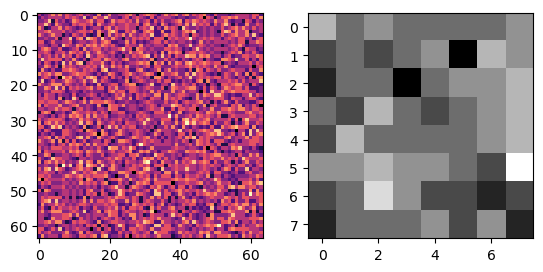

In [2761]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(model.weights, cmap='magma')

plt.subplot(1,2,2)
plt.imshow(model.weights[1].reshape(int(ndim**0.5),int(ndim**0.5)), cmap='binary')

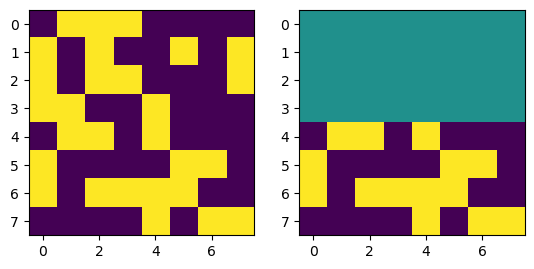

In [2762]:
state = np.copy(data[0])
state[:int(ndim/2)] = 0 # Mask
# state += np.random.randint(-1,2,(ndim)) # Noise

plt.subplot(1,2,1)
plt.imshow(data[0].reshape(int(ndim**0.5),int(ndim**0.5)))
plt.subplot(1,2,2)
plt.imshow(state.reshape(int(ndim**0.5),int(ndim**0.5)))

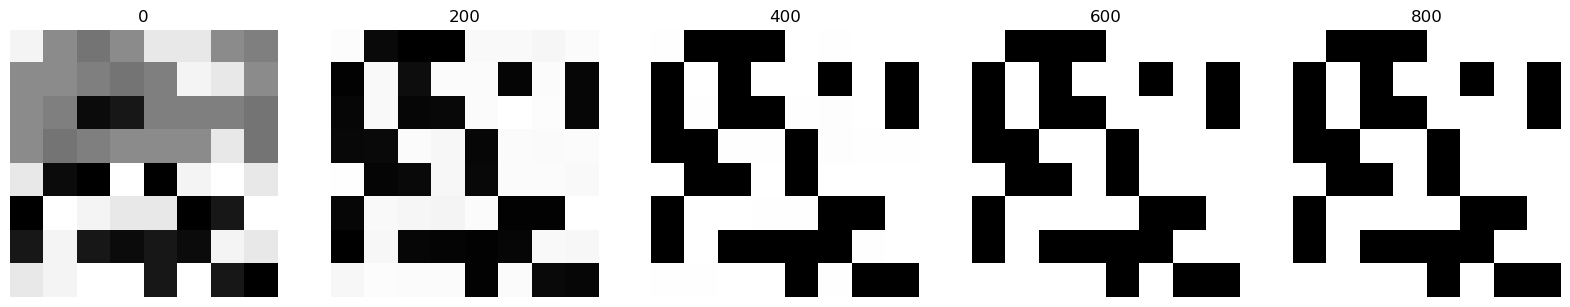

In [2763]:
# Infer (Retrieval)
steps = 1000
n_units = 16
energy = []
T = 1.0

plt.figure(figsize=(20,200))
for i in range(steps):
    state = model.infer(state, n_units).astype(float)
    E = model.compute_energy(state)
    energy.append(E)

    noise = np.random.randint(-1,2, state.shape) * T * 0.1 # Add disturbance
    state += noise

    T = max(T * 0.99, 0.01) # Simulated annealing

    stamp = steps / 5
    if i%stamp == 0:
        m = int((i/stamp)+1)
        plt.subplot(1, int(steps/stamp), m)
        plt.imshow(state.reshape(int(ndim**0.5),int(ndim**0.5)), cmap='binary')
        plt.title(i)
        plt.axis('off')

(Text(0.5, 0, 'Time'), Text(0, 0.5, 'Energy'))

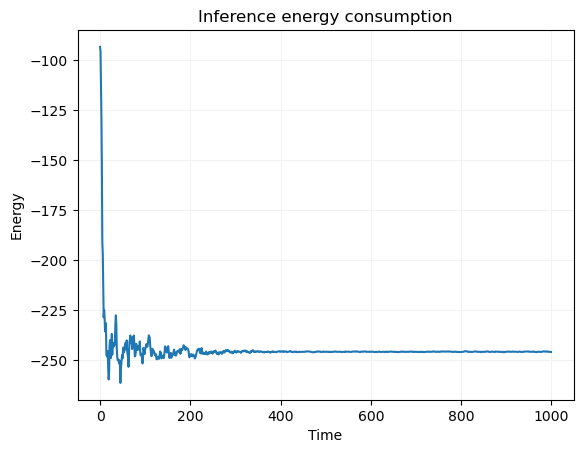

In [2764]:
x = np.arange(len(energy))
y = np.array(energy).squeeze()

plt.figure()
plt.plot(x, y)
plt.grid(axis='both', color='0.95')
plt.title('Inference energy consumption')
plt.xlabel('Time'), plt.ylabel('Energy')